In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score,confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Clasificacion de calidad de sueño


In [2]:
data = pd.read_csv('student_sleep_patterns.csv')
data.sample(5)

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
12,13,20,Other,3rd Year,4.1,3.1,2.1,3,8,6,21.69,10.69,5.05,8.79
172,173,20,Male,2nd Year,4.9,6.2,1.8,3,52,2,20.60,9.47,5.17,9.80
367,368,19,Other,1st Year,8.4,0.8,2.3,5,52,7,10.31,8.11,5.53,7.75
276,277,18,Male,2nd Year,9.0,0.8,3.4,0,58,8,6.54,10.12,6.47,8.53
494,495,22,Other,3rd Year,8.4,7.4,2.8,4,35,7,11.00,18.10,6.76,8.95


## Preprocesamiento

In [3]:
dataSleep = data.drop(columns='Student_ID')
dataSleep.tail()

,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
495,24,Male,2nd Year,5.1,9.3,1.9,4,110,4,17.42,8.43,6.93,10.78
496,20,Male,2nd Year,8.9,7.7,3.5,3,40,4,1.22,15.54,5.85,7.23
497,21,Male,3rd Year,5.7,6.4,3.9,1,68,10,9.94,2.25,5.46,10.72
498,18,Female,2nd Year,4.9,0.5,3.5,0,12,2,19.10,15.49,8.35,7.20
499,21,Male,3rd Year,7.9,11.6,1.0,0,86,1,7.54,14.12,7.01,9.19


In [4]:
Genero = []
for f in dataSleep['Gender']:
    if f == 'Male':
        Genero.append(1)
    else:
        Genero.append(0)
dataSleep['Gender'] = Genero
dataSleep.head()

,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,24,0,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,21,1,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,22,1,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,24,0,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,20,1,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


In [5]:
universityYear = []
for f in dataSleep['University_Year']:
    if f == '1st Year':
        universityYear.append(0)
    elif f == '2nd Year':
        universityYear.append(1)
    elif f == '3rd Year':
        universityYear.append(2)
    else:
        universityYear.append(3)
dataSleep['University_Year'] = universityYear
dataSleep.head()

,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,24,0,1,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,21,1,0,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,22,1,3,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,24,0,3,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,20,1,3,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


In [6]:
dataSleep.value_counts('Age')

Age
21    76
25    72
18    71
20    64
23    62
24    58
22    51
19    46
Name: count, dtype: int64

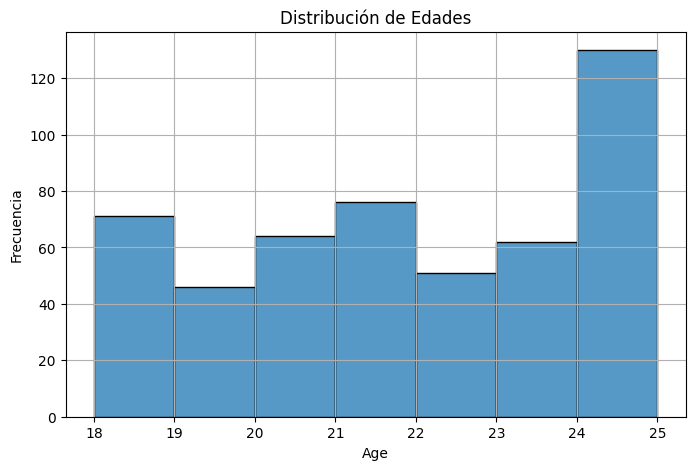

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(dataSleep['Age'], bins=range(18, 26), edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades')
plt.xticks(range(18, 26))
plt.grid(True)
plt.show()

In [8]:
dataSleep['Good_Sleep'] = dataSleep['Sleep_Duration'].between(7, 9).astype(int)
dataSleep.tail()

,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End,Good_Sleep
495,24,1,1,5.1,9.3,1.9,4,110,4,17.42,8.43,6.93,10.78,0
496,20,1,1,8.9,7.7,3.5,3,40,4,1.22,15.54,5.85,7.23,1
497,21,1,2,5.7,6.4,3.9,1,68,10,9.94,2.25,5.46,10.72,0
498,18,0,1,4.9,0.5,3.5,0,12,2,19.10,15.49,8.35,7.20,0
499,21,1,2,7.9,11.6,1.0,0,86,1,7.54,14.12,7.01,9.19,1


In [9]:
dataSleep.value_counts('Good_Sleep')

Good_Sleep
0    286
1    214
Name: count, dtype: int64

In [10]:
dataSleepSVM = dataSleep[['Sleep_Duration','Age','University_Year','Good_Sleep']]
dataSleepSVM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sleep_Duration   500 non-null    float64
 1   Age              500 non-null    int64  
 2   University_Year  500 non-null    int64  
 3   Good_Sleep       500 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 15.8 KB


<Axes: >

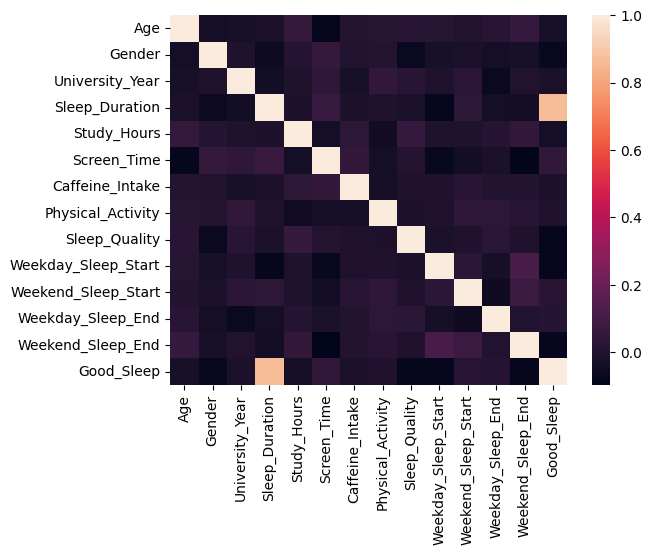

In [11]:
sns.heatmap(dataSleep.corr())

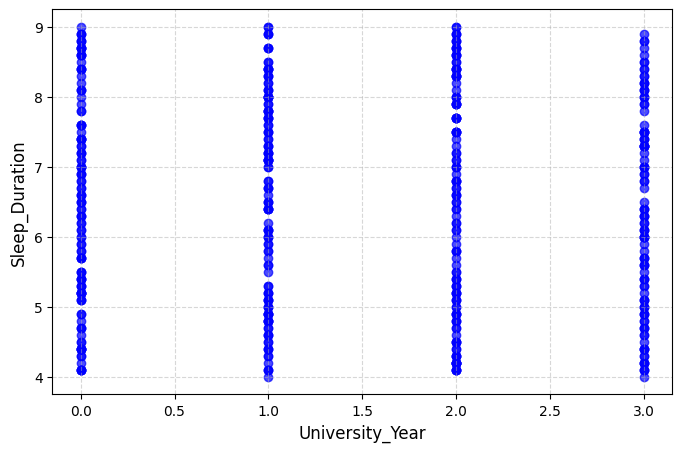

In [12]:
plt.figure(figsize=(8, 5))
plt.scatter(dataSleepSVM['University_Year'], dataSleepSVM['Sleep_Duration'], color='blue', alpha=0.7)
plt.title('', fontsize=14)
plt.xlabel('University_Year', fontsize=12)
plt.ylabel('Sleep_Duration', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

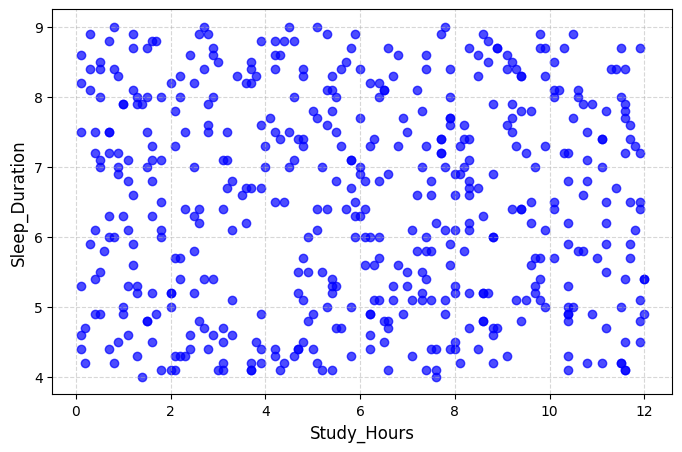

In [13]:
plt.figure(figsize=(8, 5))
plt.scatter(dataSleep['Study_Hours'], dataSleep['Sleep_Duration'], color='blue', alpha=0.7)
plt.title('', fontsize=14)
plt.xlabel('Study_Hours', fontsize=12)
plt.ylabel('Sleep_Duration', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

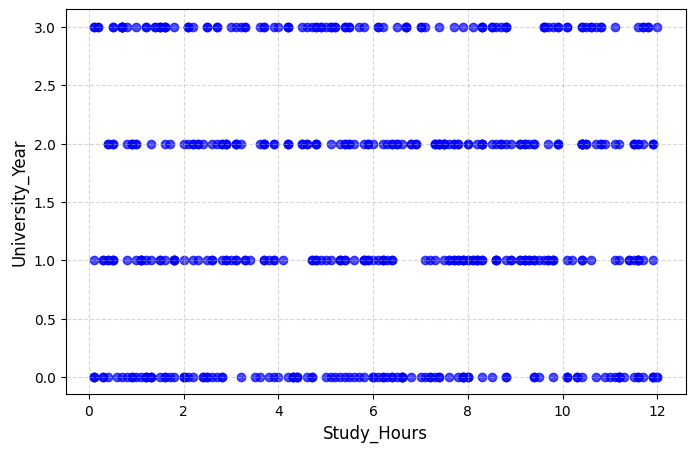

In [14]:
plt.figure(figsize=(8, 5))
plt.scatter(dataSleep['Study_Hours'], dataSleep['University_Year'], color='blue', alpha=0.7)
plt.title('', fontsize=14)
plt.xlabel('Study_Hours', fontsize=12)
plt.ylabel('University_Year', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Super Vector Machine

In [15]:
x_train,x_test,y_train,y_test=train_test_split(dataSleepSVM.drop(columns='Good_Sleep'), dataSleepSVM['Good_Sleep'], test_size=0.25, random_state=2023)

In [16]:
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

In [17]:
clf.score(x_test, y_test)

0.984

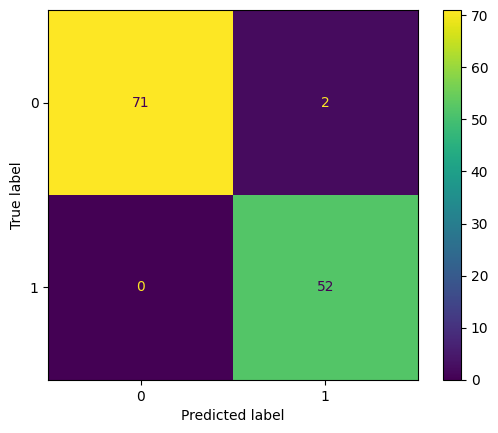

In [18]:
predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions )
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## K-nearest Neighbors


In [19]:
x_train,x_test,y_train,y_test=train_test_split(dataSleep.drop(columns='Good_Sleep'), dataSleep['Good_Sleep'], test_size=0.1, random_state=2023)

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [21]:
y_pred = knn.predict(x_test)

accuracy_score(y_test, y_pred)

0.7

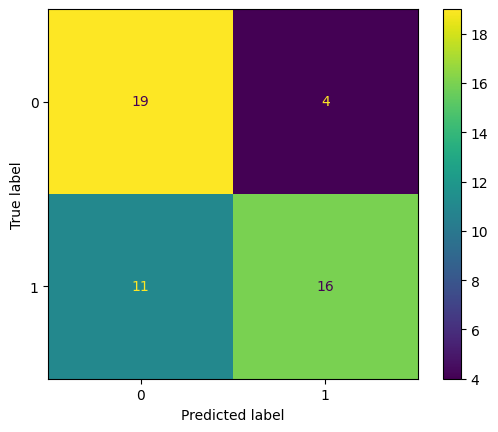

In [22]:
predictions = knn.predict(x_test)
cm = confusion_matrix(y_test, predictions )
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## 2 variables SVM

In [23]:
dataSleepSVM2 = dataSleepSVM.drop(columns='University_Year')
dataSleepSVM2.head()

,Sleep_Duration,Age,Good_Sleep
0,7.7,24,1
1,6.3,21,0
2,5.1,22,0
3,6.3,24,0
4,4.7,20,0


In [24]:
x_train,x_test,y_train,y_test=train_test_split(dataSleepSVM2.drop(columns='Good_Sleep'), dataSleepSVM2['Good_Sleep'], test_size=0.25, random_state=2023)

In [25]:
clf2 = svm.SVC()
clf2.fit(x_train, y_train)

SVC()

In [26]:
clf2.score(x_test, y_test)

0.992

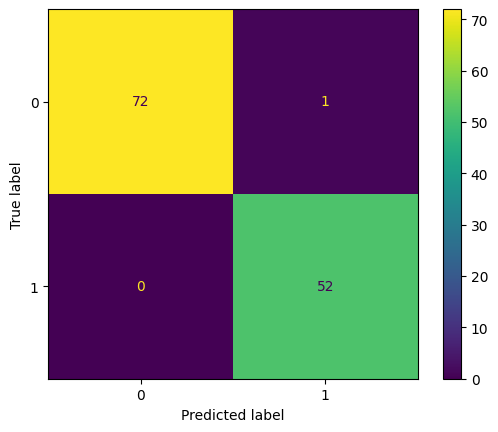

In [27]:
predictions = clf2.predict(x_test)
cm = confusion_matrix(y_test, predictions )
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

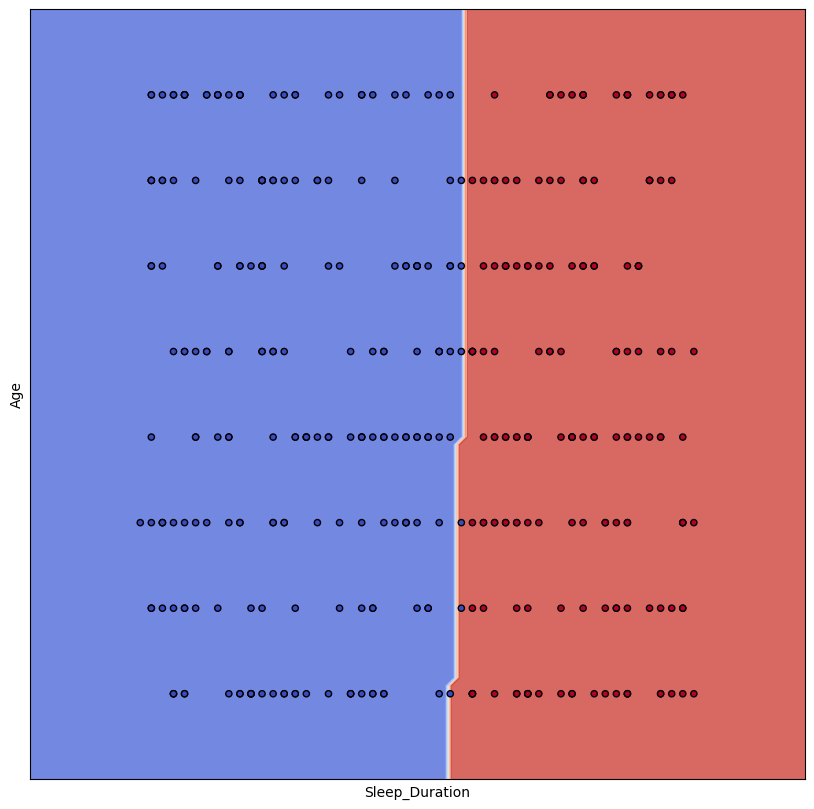

In [28]:
figure = plt.figure(figsize=(10,10))
axes = figure.add_subplot(111)
disp = DecisionBoundaryDisplay.from_estimator(
        clf2,
        x_train,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=axes,
        xlabel='Sleep_Duration',
        ylabel='Age',
    )
axes.scatter(x_train['Sleep_Duration'], x_train['Age'], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
axes.set_xticks(())
axes.set_yticks(())

plt.show()

## 2 variables "Study_Hours" y "Sleep_Duration" con el target "Good_Sleep" SVM

In [29]:
dataSleepSSG = dataSleep[['Sleep_Duration','Study_Hours','Good_Sleep']]
dataSleepSSG.head()

,Sleep_Duration,Study_Hours,Good_Sleep
0,7.7,7.9,1
1,6.3,6.0,0
2,5.1,6.7,0
3,6.3,8.6,0
4,4.7,2.7,0


In [30]:
x_train,x_test,y_train,y_test=train_test_split(dataSleepSSG.drop(columns='Good_Sleep'), dataSleepSSG['Good_Sleep'], test_size=0.5, random_state=2023)

In [31]:
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

In [32]:
clf.score(x_test, y_test)

0.992

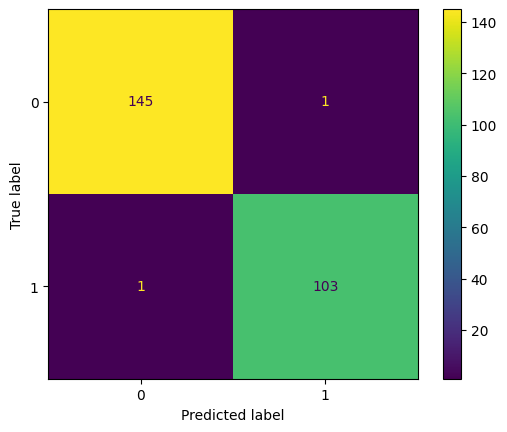

In [33]:
predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions )
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

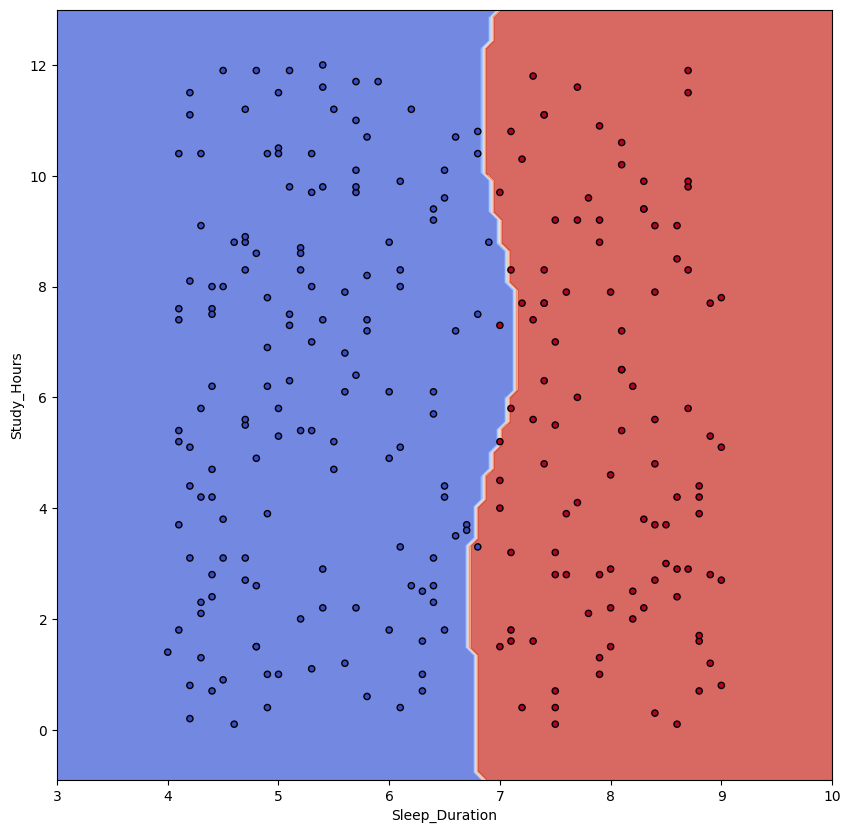

In [34]:
figure = plt.figure(figsize=(10,10))
axes = figure.add_subplot(111)
disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        x_test,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=axes,
        xlabel='Sleep_Duration',
        ylabel='Study_Hours',
    )
axes.scatter(x_test['Sleep_Duration'], x_test['Study_Hours'], c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

plt.show()

# Test

In [35]:
def resultado(pred):
  if pred[0] == 1:
    print('El estudiante duerme bien')
  else:
    print('El estudiante no duerme bien')

In [36]:
data = {
    'Sleep_Duration': [7.2, 5.5],
    'Study_Hours': [2, 4]
}
dataframe = pd.DataFrame(data)
dataframe

,Sleep_Duration,Study_Hours
0,7.2,2
1,5.5,4


In [37]:
prediccion = clf.predict(dataframe.iloc[0:1])
resultado(prediccion)

prediccion = clf.predict(dataframe.iloc[1:2])
resultado(prediccion)

El estudiante duerme bien
El estudiante no duerme bien
